# 1. Porównanie dokładności: Random Forest, XGBoost, Stacking

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Dane
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
acc_xgb = accuracy_score(y_test, xgb.predict(X_test))

# Stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
acc_stack = accuracy_score(y_test, stack.predict(X_test))

print("Dokładności:")
print(f"Random Forest: {acc_rf:.4f}")
print(f"XGBoost: {acc_xgb:.4f}")
print(f"Stacking: {acc_stack:.4f}")


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:39:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Dokładności:
Random Forest: 0.9649
XGBoost: 0.9561
Stacking: 0.9737


# 2. Tuning hiperparametrów XGBoost

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
}

grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_
acc_best_xgb = accuracy_score(y_test, best_xgb.predict(X_test))

print("Najlepsze parametry:", grid.best_params_)
print("Dokładność najlepszego modelu XGBoost:", acc_best_xgb)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Dokładność najlepszego modelu XGBoost: 0.956140350877193


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:39:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# 3. Dodanie nowego modelu do stacking (np. KNN)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

estimators_knn = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

stack_knn = StackingClassifier(estimators=estimators_knn, final_estimator=LogisticRegression())
stack_knn.fit(X_train, y_train)
acc_stack_knn = accuracy_score(y_test, stack_knn.predict(X_test))

print("Stacking (z KNN):", acc_stack_knn)


Stacking (z KNN): 0.9736842105263158


# 4. Test na innych zbiorach (Wine, Iris)

In [6]:
from sklearn.datasets import load_wine, load_iris

# Zbiór Wine
Xw, yw = load_wine(return_X_y=True)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2, random_state=42)

model_wine = RandomForestClassifier(n_estimators=100, random_state=42)
model_wine.fit(Xw_train, yw_train)
acc_wine = accuracy_score(yw_test, model_wine.predict(Xw_test))

# Zbiór Iris
Xi, yi = load_iris(return_X_y=True)
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=42)

model_iris = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_iris.fit(Xi_train, yi_train)
acc_iris = accuracy_score(yi_test, model_iris.predict(Xi_test))

print(f"Dokładność na Wine (Random Forest): {acc_wine:.4f}")
print(f"Dokładność na Iris (XGBoost): {acc_iris:.4f}")


Dokładność na Wine (Random Forest): 1.0000
Dokładność na Iris (XGBoost): 1.0000


c:\Users\szymo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:39:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# 5. Wykres słupkowy porównujący dokładność

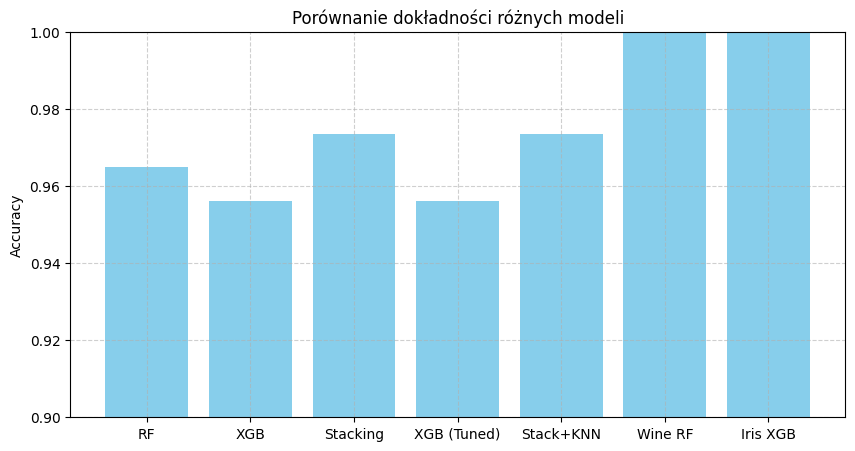

In [7]:
import matplotlib.pyplot as plt

labels = ['RF', 'XGB', 'Stacking', 'XGB (Tuned)', 'Stack+KNN', 'Wine RF', 'Iris XGB']
scores = [acc_rf, acc_xgb, acc_stack, acc_best_xgb, acc_stack_knn, acc_wine, acc_iris]

plt.figure(figsize=(10, 5))
plt.bar(labels, scores, color='skyblue')
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.title("Porównanie dokładności różnych modeli")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
